In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
np.max(train_images)

255

In [5]:
# convert image pixel into o to 1 scale i.e normalise the data
train_images = train_images/255.0
test_images = test_images/255.0

In [6]:
# reshape the images into unform color pixel
train_images = train_images.reshape(len(train_images), 28,28,1)
test_images = test_images.reshape(len(test_images), 28,28,1)

In [7]:
# defining the CNN model
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import ReLU
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.optimizers import SGD

In [8]:
opt = SGD(lr =0.01, momentum= 0.9)

In [9]:
# create the function for CNN model evaluater
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3,3), activation= "relu", kernel_initializer="he_uniform", input_shape=(28,28,1)))
  model.add(MaxPooling2D(2,2))
  model.add(Flatten())
  model.add(Dense(10, activation="softmax"))
  model.compile(optimizer = opt, loss = "sparse_categorical_crossentropy", metrics= ["accuracy"])
  return model

In [10]:
from sklearn.model_selection import KFold

In [11]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		train_images_val, train_labels_val, test_images_val, test_labels_val = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    # fit model
		history = model.fit(train_images_val, train_labels_val, epochs=10, batch_size=32, validation_data=(test_images_val, test_labels_val), verbose=0)  
		# evaluate model
		_, acc = model.evaluate(test_images, test_labels, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# append scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

In [12]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		plt.subplot(211)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='blue', label='train')
		plt.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		plt.subplot(212)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='blue', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	plt.show()

In [13]:
# summarize model performance
from numpy import mean
from numpy import std
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	plt.boxplot(scores)
	plt.show()

In [14]:
# run the test harness for evaluating a model
def run_test_harness():
	# evaluate model
	scores, histories = evaluate_model(train_images, train_labels)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)

> 89.560
> 89.960
> 90.220
> 89.880
> 89.860


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


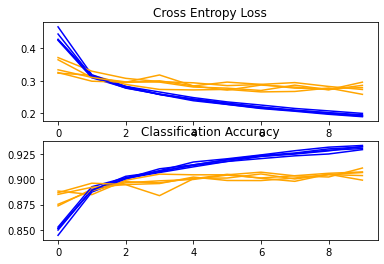

Accuracy: mean=89.896 std=0.211, n=5


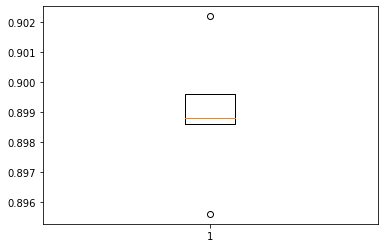

In [15]:
# entry point, run the test harness
run_test_harness()